In [3]:
# import packages/libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.model_selection import train_test_split

Data Exploration/Cleaning

In [4]:
# get file path
curr_dir = os.getcwd()
file_name = 'churn_clean.csv'
file_path = os.path.join(curr_dir, file_name)

# load dataset
churn_df = pd.read_csv(file_path, converters={'InternetService': lambda x: (x.replace('None', 'No Service'))})

# Drop less meaningful variables to the target variable
drop_vars = ['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng', 'Population', 'TimeZone', 'Job', 'Marital', 'Email', 'Contacts', 'DeviceProtection', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8']
churn_df.drop(drop_vars, axis=1, inplace=True)

# identify data types, null values, misspellings, inconsistent column naming
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Area                  10000 non-null  object 
 1   Children              10000 non-null  int64  
 2   Age                   10000 non-null  int64  
 3   Income                10000 non-null  float64
 4   Gender                10000 non-null  object 
 5   Churn                 10000 non-null  object 
 6   Outage_sec_perweek    10000 non-null  float64
 7   Yearly_equip_failure  10000 non-null  int64  
 8   Techie                10000 non-null  object 
 9   Contract              10000 non-null  object 
 10  Port_modem            10000 non-null  object 
 11  Tablet                10000 non-null  object 
 12  InternetService       10000 non-null  object 
 13  Phone                 10000 non-null  object 
 14  Multiple              10000 non-null  object 
 15  OnlineSecurity      

In [5]:
# check duplicate data
duplicates = churn_df.duplicated().sum()
if duplicates > 0:
	print(f'Number of duplicates: {duplicates}')
else:
	print('No duplicates in the dataset')

No duplicates in the dataset


In [6]:
# reorganize the dataset
churn_df = churn_df.iloc[:, list(range(5, 6)) + list(range(0, 5)) + list(range(6, churn_df.columns.value_counts().sum()))]
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Churn                 10000 non-null  object 
 1   Area                  10000 non-null  object 
 2   Children              10000 non-null  int64  
 3   Age                   10000 non-null  int64  
 4   Income                10000 non-null  float64
 5   Gender                10000 non-null  object 
 6   Outage_sec_perweek    10000 non-null  float64
 7   Yearly_equip_failure  10000 non-null  int64  
 8   Techie                10000 non-null  object 
 9   Contract              10000 non-null  object 
 10  Port_modem            10000 non-null  object 
 11  Tablet                10000 non-null  object 
 12  InternetService       10000 non-null  object 
 13  Phone                 10000 non-null  object 
 14  Multiple              10000 non-null  object 
 15  OnlineSecurity      

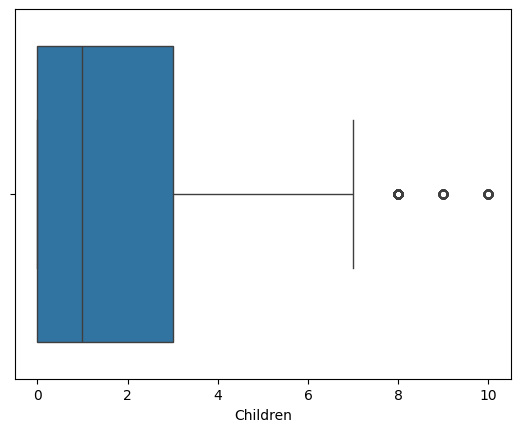

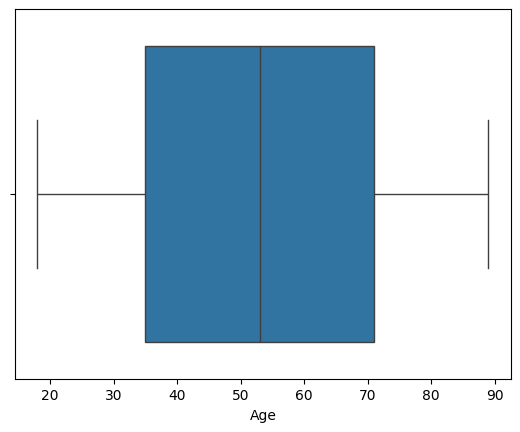

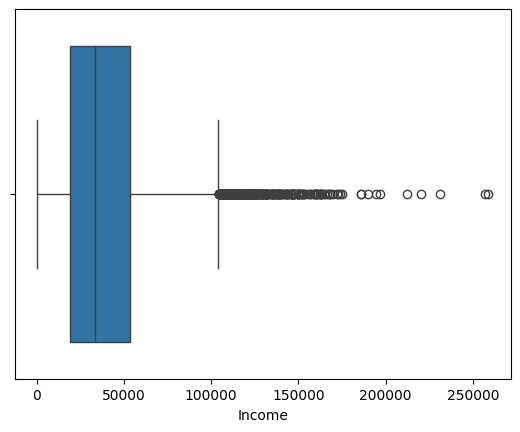

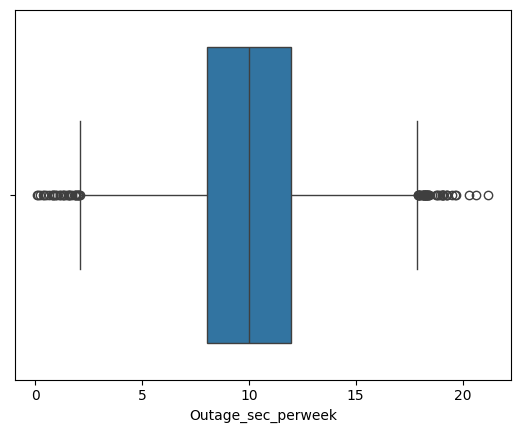

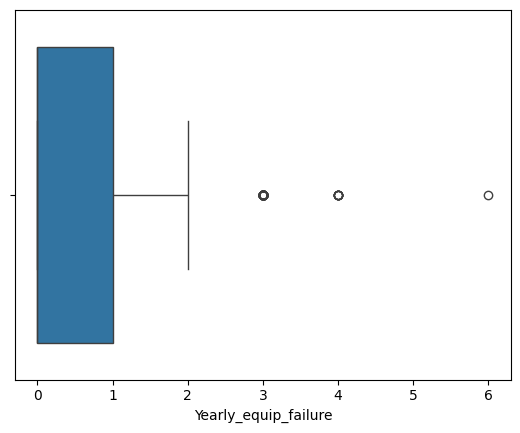

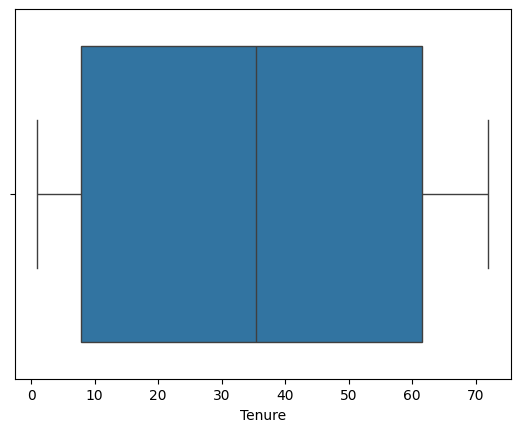

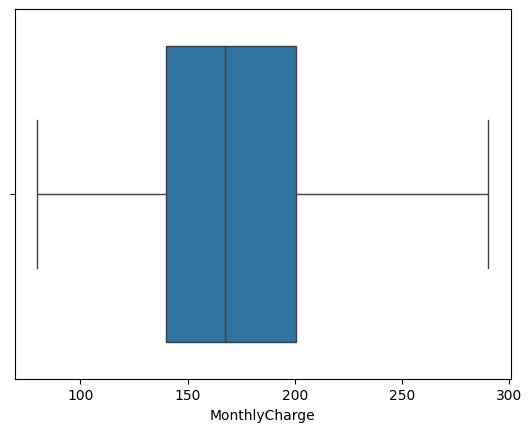

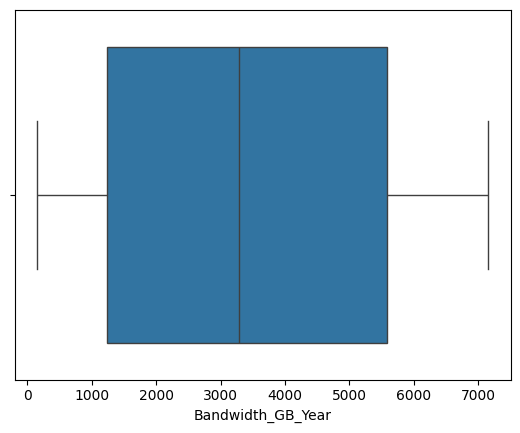

In [7]:
# find outliers in numeric variables
for var in list(churn_df.select_dtypes(exclude='object').columns):
	sns.boxplot(x=var, data=churn_df)
	plt.show()

Summary statistics/visualizations

Churn
Churn
No     7350
Yes    2650
Name: count, dtype: int64



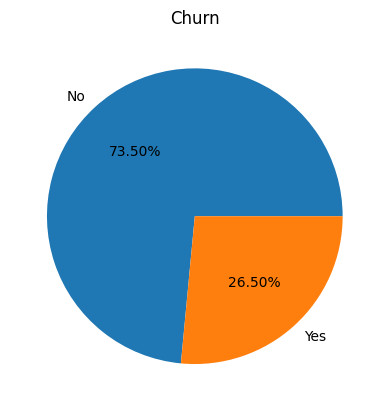

Area
Area
Suburban    3346
Urban       3327
Rural       3327
Name: count, dtype: int64



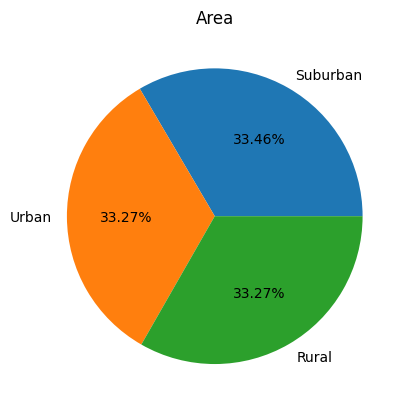

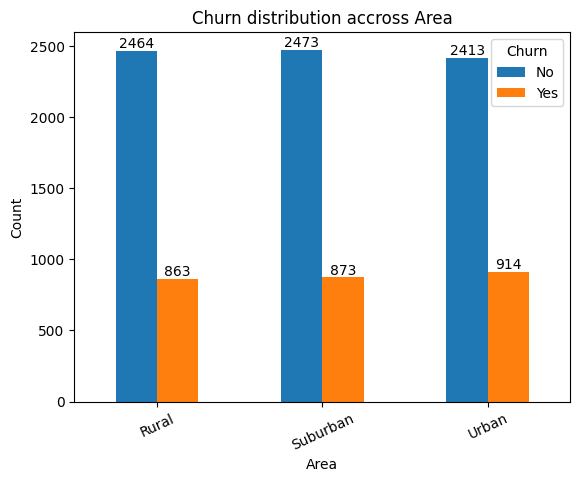

Children
count    10000.0000
mean         2.0877
std          2.1472
min          0.0000
25%          0.0000
50%          1.0000
75%          3.0000
max         10.0000
Name: Children, dtype: float64



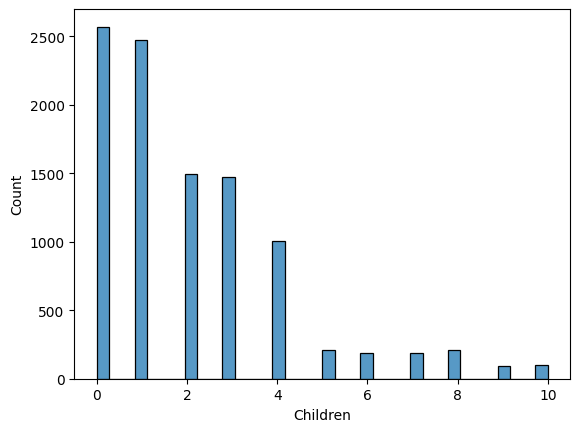

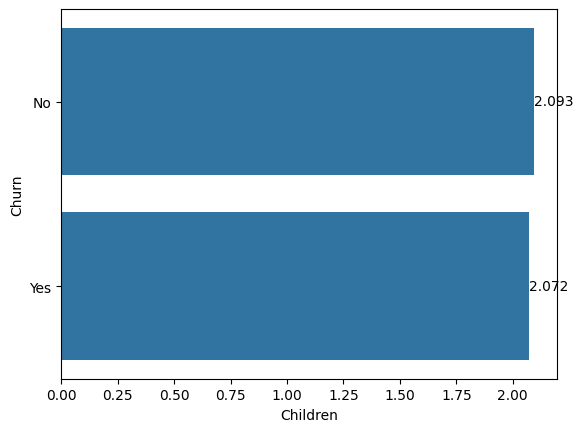

Age
count    10000.000000
mean        53.078400
std         20.698882
min         18.000000
25%         35.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64



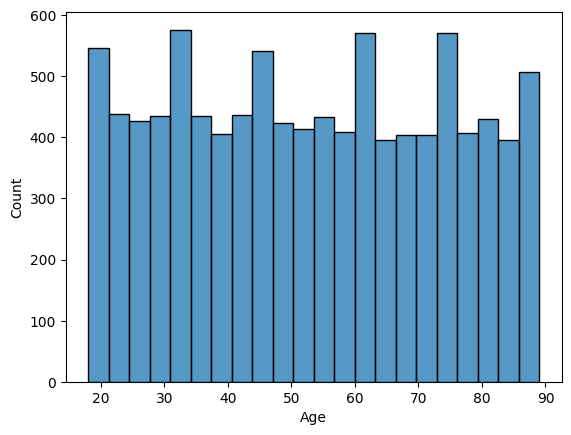

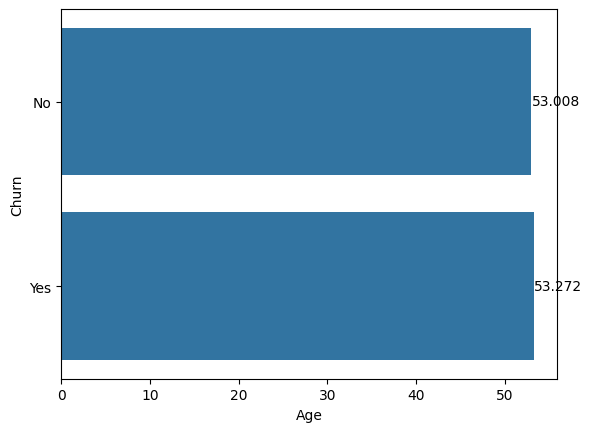

Income
count     10000.000000
mean      39806.926771
std       28199.916702
min         348.670000
25%       19224.717500
50%       33170.605000
75%       53246.170000
max      258900.700000
Name: Income, dtype: float64



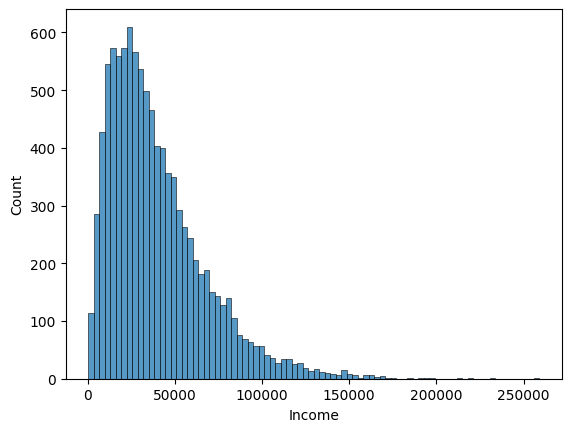

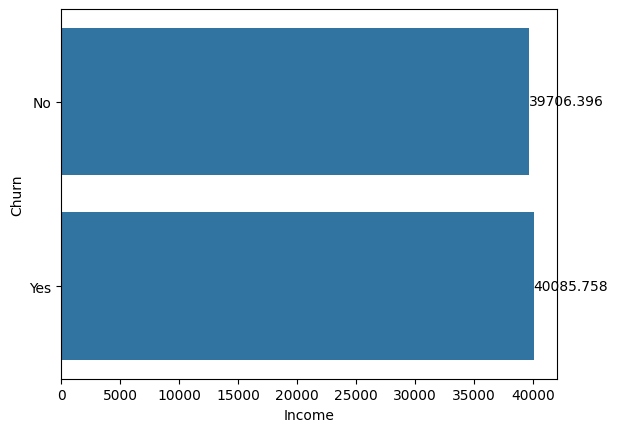

Gender
Gender
Female       5025
Male         4744
Nonbinary     231
Name: count, dtype: int64



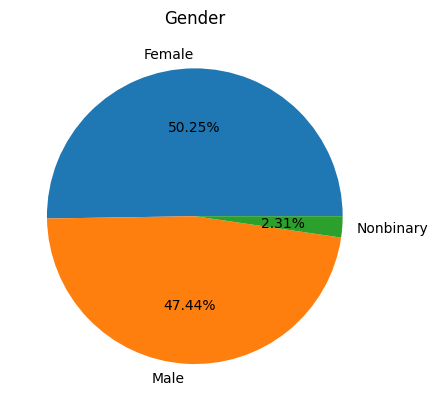

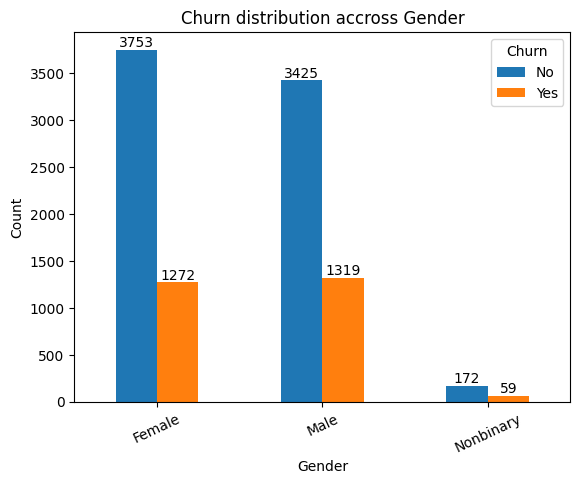

Outage_sec_perweek
count    10000.000000
mean        10.001848
std          2.976019
min          0.099747
25%          8.018214
50%         10.018560
75%         11.969485
max         21.207230
Name: Outage_sec_perweek, dtype: float64



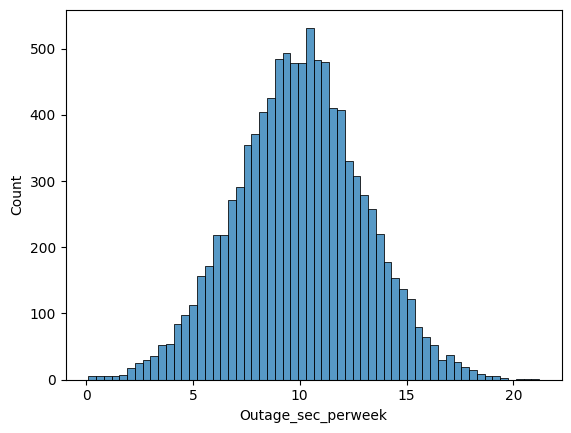

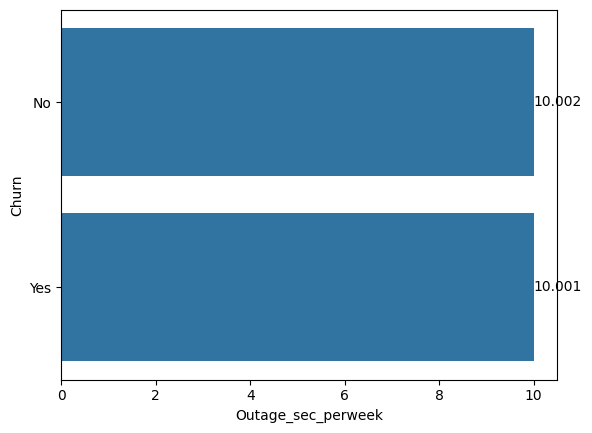

Yearly_equip_failure
count    10000.000000
mean         0.398000
std          0.635953
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          6.000000
Name: Yearly_equip_failure, dtype: float64



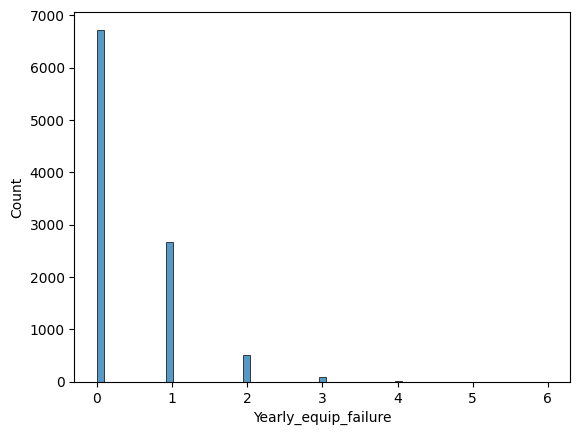

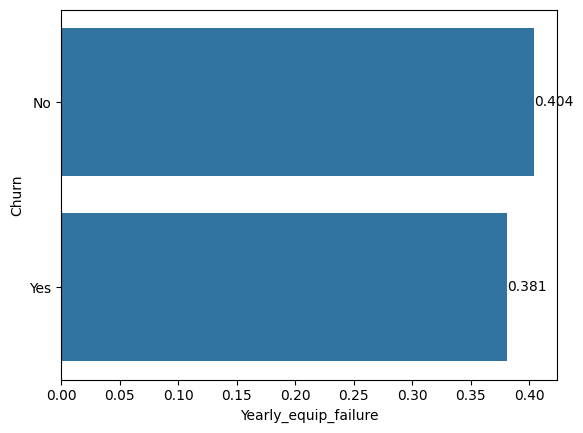

Techie
Techie
No     8321
Yes    1679
Name: count, dtype: int64



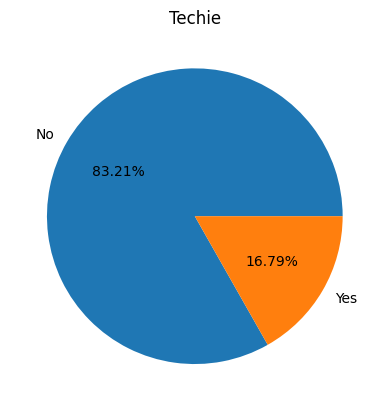

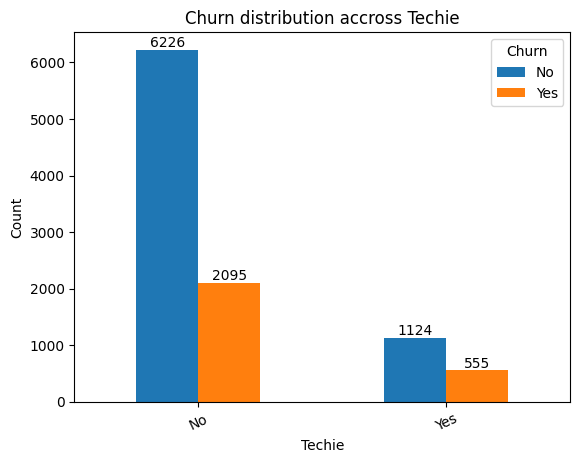

Contract
Contract
Month-to-month    5456
Two Year          2442
One year          2102
Name: count, dtype: int64



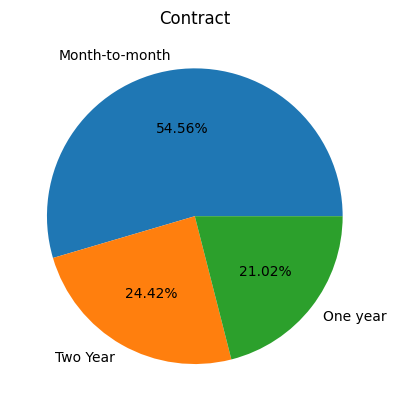

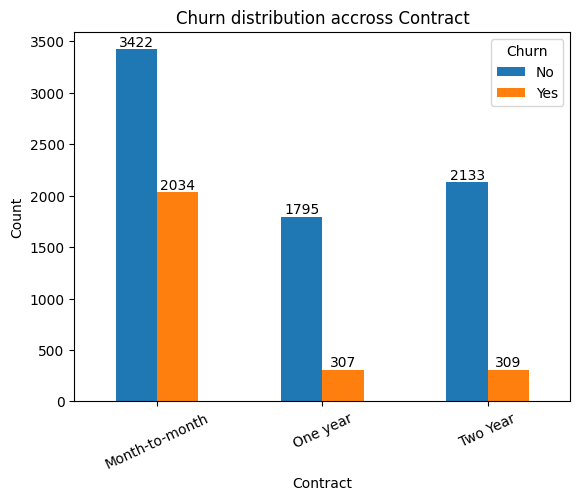

Port_modem
Port_modem
No     5166
Yes    4834
Name: count, dtype: int64



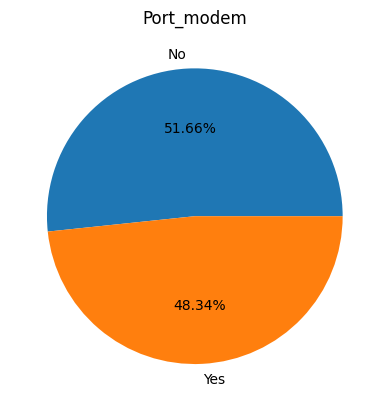

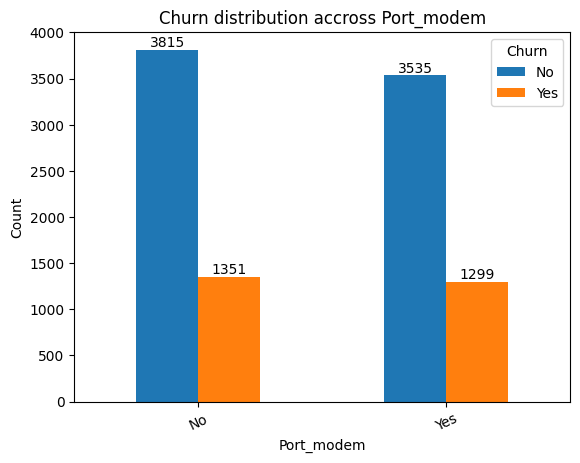

Tablet
Tablet
No     7009
Yes    2991
Name: count, dtype: int64



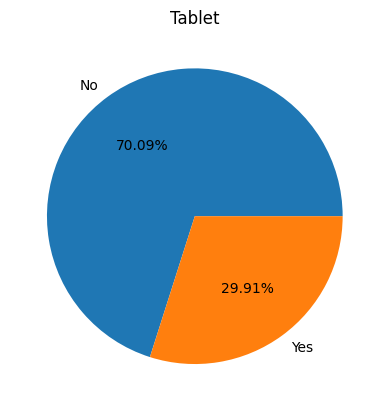

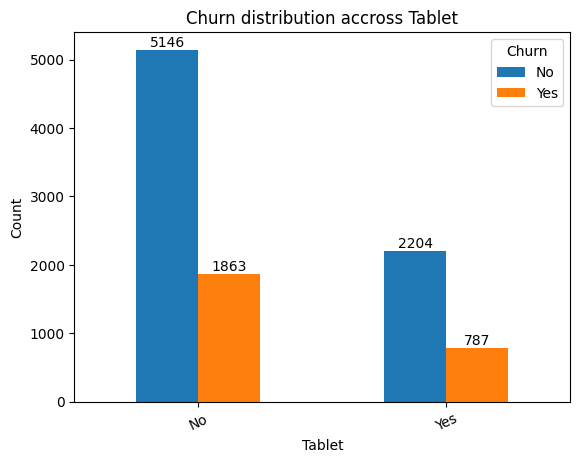

InternetService
InternetService
Fiber Optic    4408
DSL            3463
No Service     2129
Name: count, dtype: int64



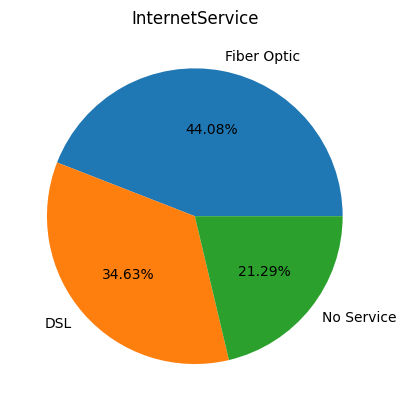

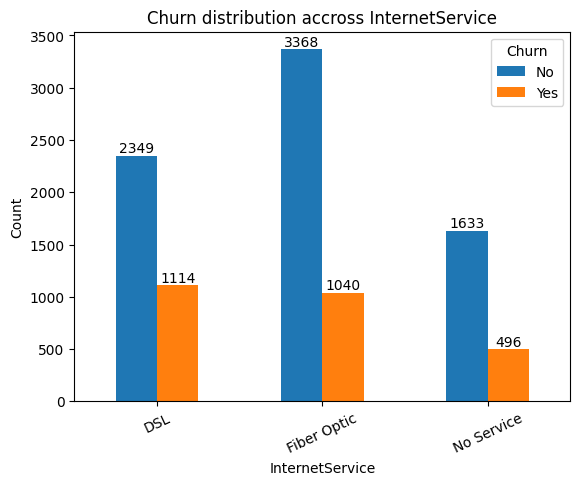

Phone
Phone
Yes    9067
No      933
Name: count, dtype: int64



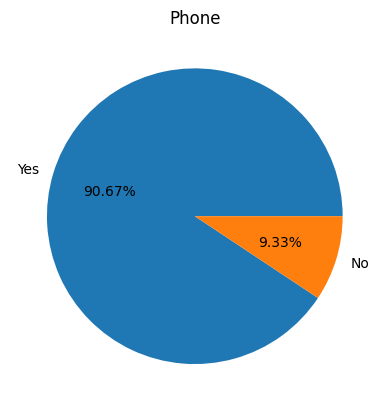

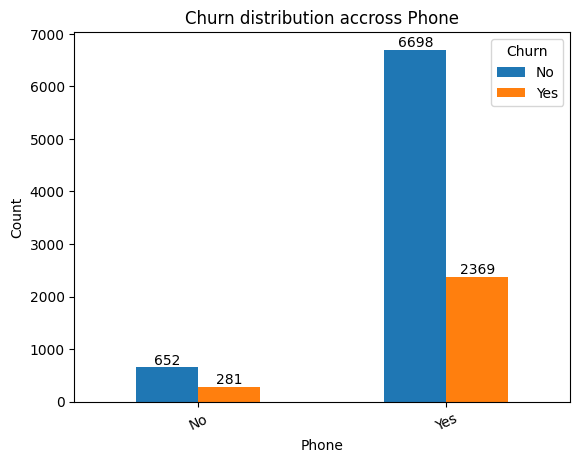

Multiple
Multiple
No     5392
Yes    4608
Name: count, dtype: int64



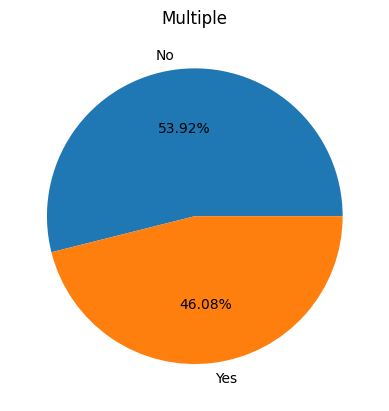

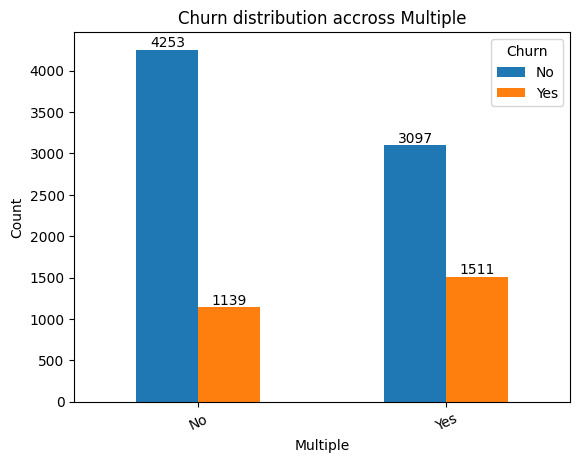

OnlineSecurity
OnlineSecurity
No     6424
Yes    3576
Name: count, dtype: int64



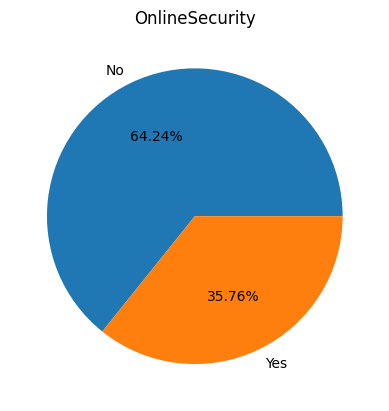

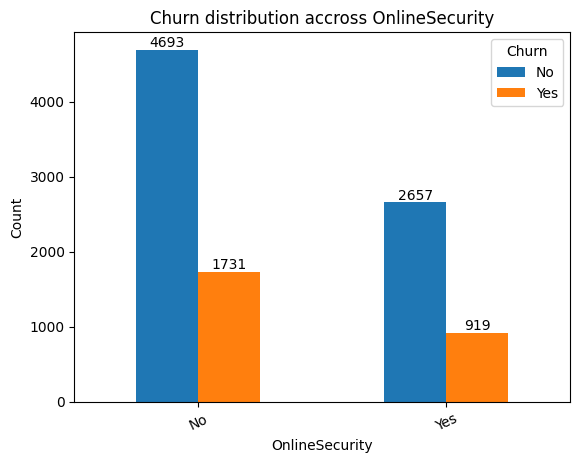

OnlineBackup
OnlineBackup
No     5494
Yes    4506
Name: count, dtype: int64



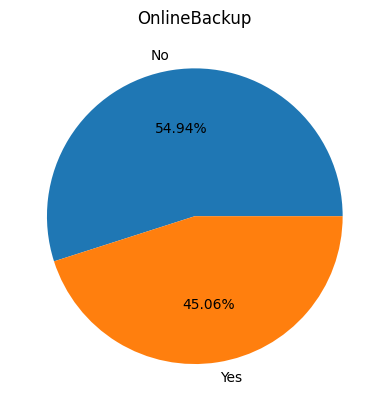

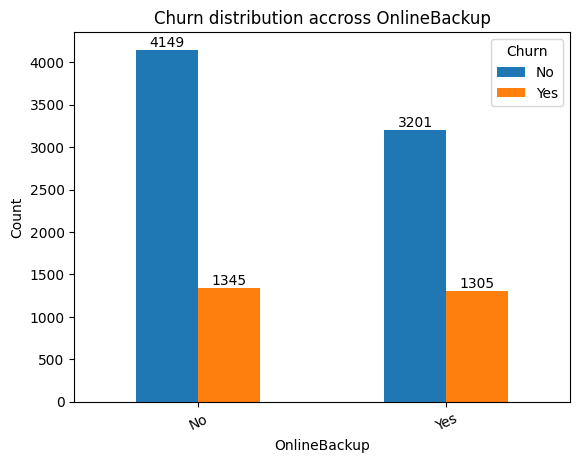

TechSupport
TechSupport
No     6250
Yes    3750
Name: count, dtype: int64



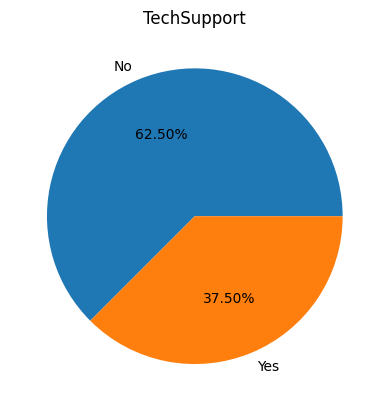

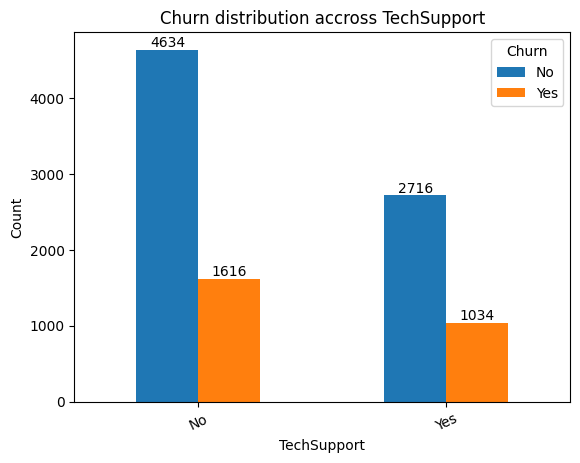

StreamingTV
StreamingTV
No     5071
Yes    4929
Name: count, dtype: int64



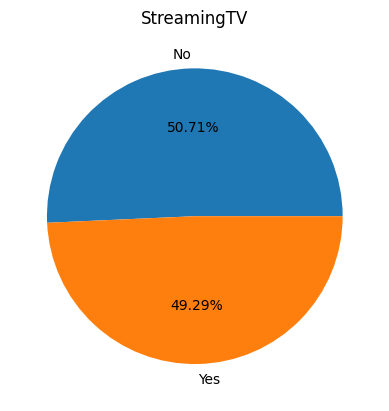

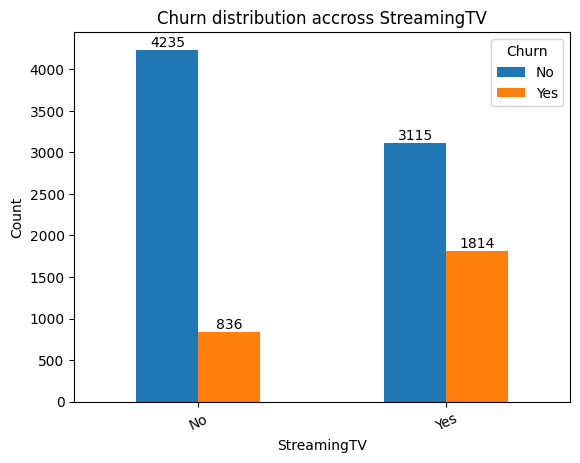

StreamingMovies
StreamingMovies
No     5110
Yes    4890
Name: count, dtype: int64



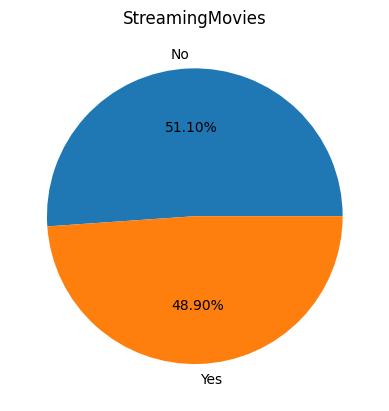

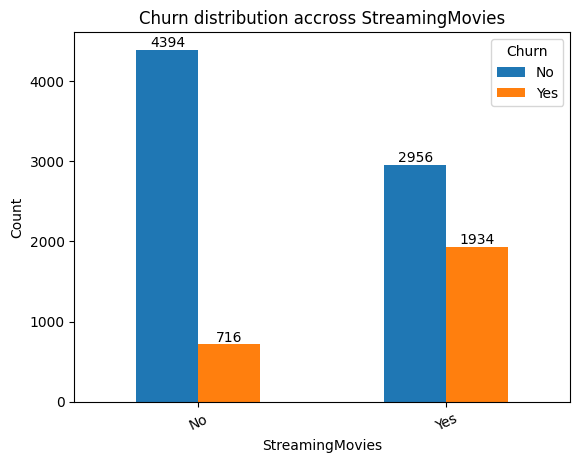

PaperlessBilling
PaperlessBilling
Yes    5882
No     4118
Name: count, dtype: int64



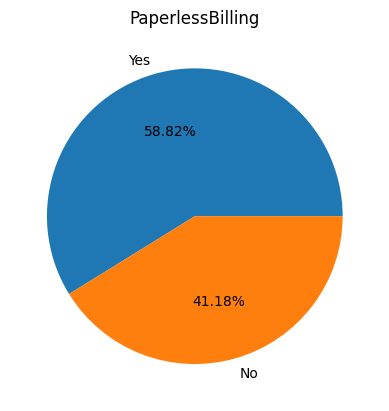

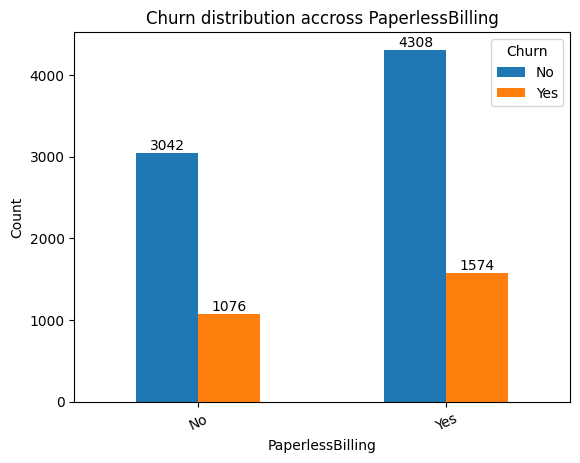

PaymentMethod
PaymentMethod
Electronic Check            3398
Mailed Check                2290
Bank Transfer(automatic)    2229
Credit Card (automatic)     2083
Name: count, dtype: int64



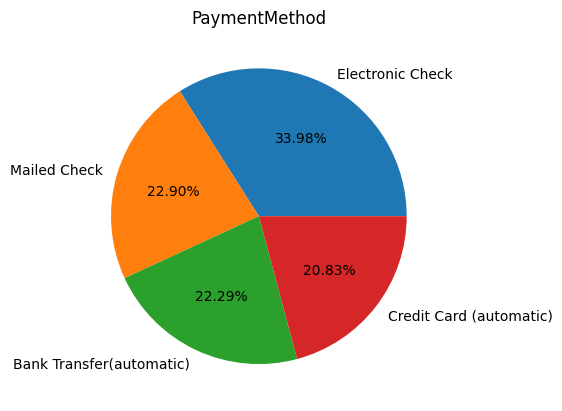

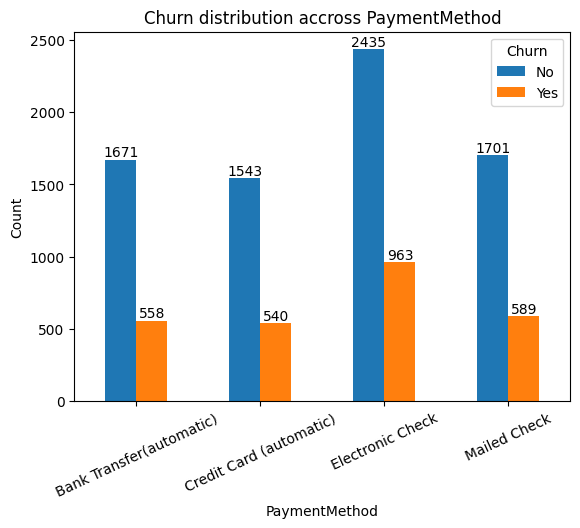

Tenure
count    10000.000000
mean        34.526188
std         26.443063
min          1.000259
25%          7.917694
50%         35.430507
75%         61.479795
max         71.999280
Name: Tenure, dtype: float64



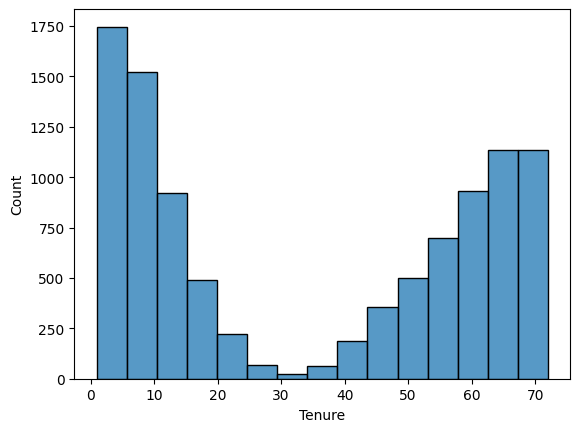

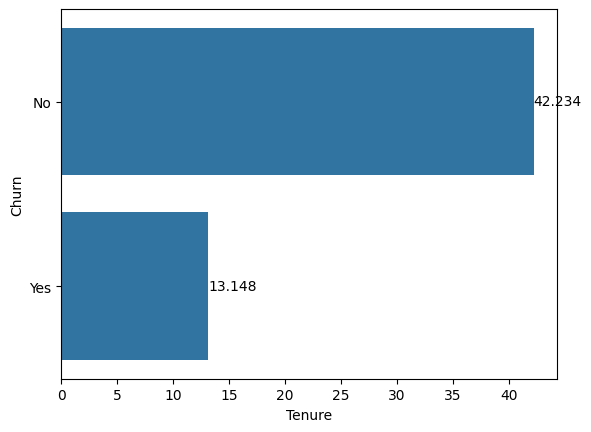

MonthlyCharge
count    10000.000000
mean       172.624816
std         42.943094
min         79.978860
25%        139.979239
50%        167.484700
75%        200.734725
max        290.160419
Name: MonthlyCharge, dtype: float64



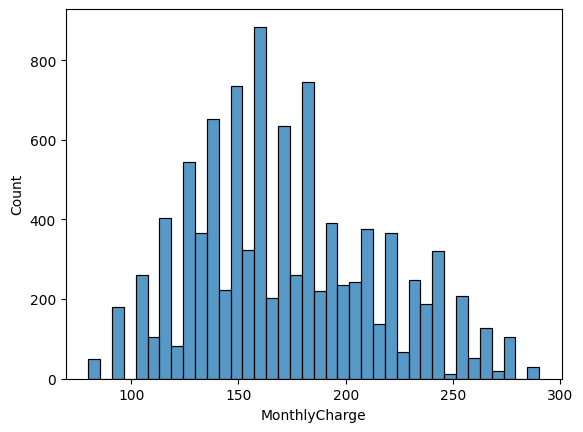

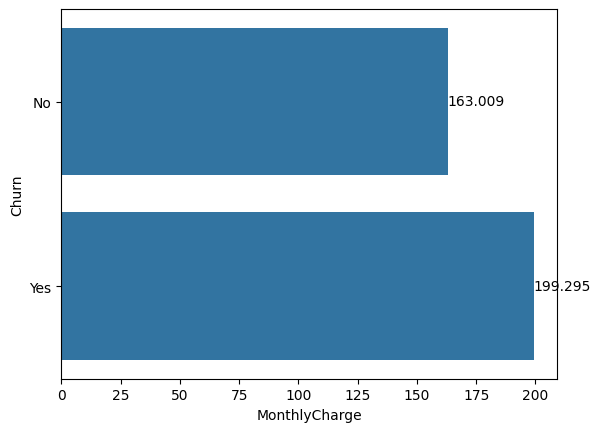

Bandwidth_GB_Year
count    10000.000000
mean      3392.341550
std       2185.294852
min        155.506715
25%       1236.470827
50%       3279.536903
75%       5586.141370
max       7158.981530
Name: Bandwidth_GB_Year, dtype: float64



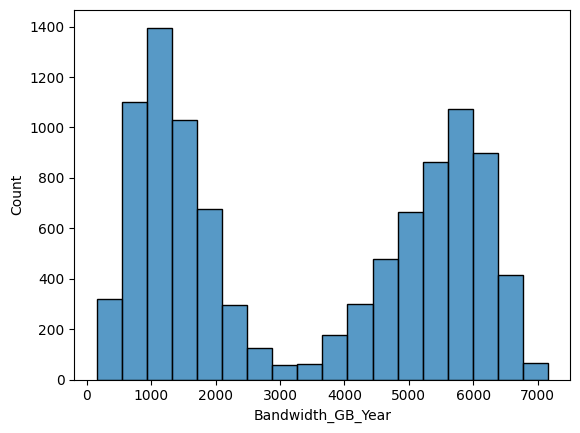

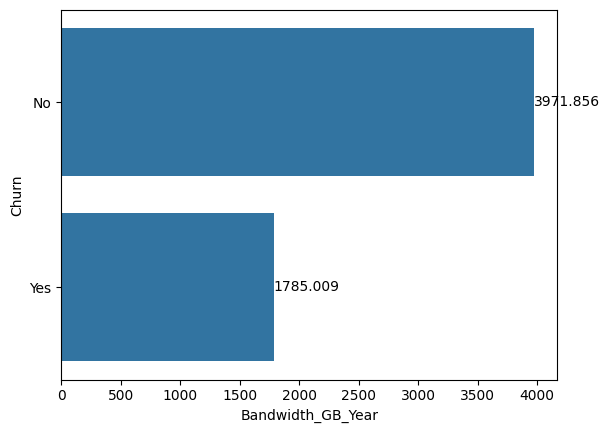

In [8]:
# Summary statistics
for var in list(churn_df.columns.to_list()):
	print(var)

	# statistics
	if (churn_df[var].dtype == 'object'):
		counts = churn_df[var].value_counts()
		print(counts, end='\n\n')

		# Univariate: pie chart
		plt.pie(counts, labels=counts.index, autopct='%1.2f%%')
		plt.title(var)
		plt.show()

		# Bivariate: clustered bar chart [In-text citation: (Bobbitt, 2022)]
		if var != 'Churn':
			# create data frame between Churn and each categorical data
			count_df = churn_df.groupby([var, 'Churn']).size().unstack()
			ax = count_df.plot.bar()
			# add annotattion bars
			for container in ax.containers:
				ax.bar_label(container)
			plt.ylabel('Count')
			plt.title(f'Churn distribution accross {var}')
			plt.xticks(rotation=25)
			plt.show()
	else:
		print(churn_df[var].describe(), end='\n\n')

		# Univariate: histograms
		sns.histplot(data=churn_df, x=var)
		plt.show()

		# Bivariate: barcharts [In-text Citation: (Seaborn.barplot# n.d.)]
		barchart = sns.barplot(data=churn_df, x=var, y='Churn', errorbar=None)
		# Add annotations (mean values)
		barchart.bar_label(barchart.containers[0], fontsize=10, fmt='%0.3f')
		plt.show()

Data Transformation

In [9]:
# Identify binary and non-binary variables
binary_list = []
nonbinary_list = []
for var in list(churn_df.select_dtypes(include=['object']).columns):
	if churn_df[var].nunique() == 2:
		binary_list.append(var)
	else:
		nonbinary_list.append(var)
print(binary_list)
print(nonbinary_list)

['Churn', 'Techie', 'Port_modem', 'Tablet', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']
['Area', 'Gender', 'Contract', 'InternetService', 'PaymentMethod']


In [10]:
# Data Transform: Convert cateogorical data into numeric format
binary = churn_df[binary_list]

# Perform one-hot encoding [In-text Citation: (Onehotencoder, n.d.)]
# Binary columns
encoder_binary = OneHotEncoder(sparse_output=False, drop='if_binary')

data_binary = encoder_binary.fit_transform(binary[binary_list])
cols_binary = encoder_binary.get_feature_names_out(binary_list)

# Convert to the data frame
df_binary = pd.DataFrame(data_binary, columns=cols_binary)
df_binary

,Churn_Yes,Techie_Yes,Port_modem_Yes,Tablet_Yes,Phone_Yes,Multiple_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,PaperlessBilling_Yes
0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
1,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
2,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
9996,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
9997,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
9998,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0


In [11]:
non_binary = churn_df[nonbinary_list]

# Non-binary columns
encoder_nonbinary = OneHotEncoder(sparse_output=False, drop='first')
data_nonbinary = encoder_nonbinary.fit_transform(non_binary[nonbinary_list])
cols_nonbinary = encoder_nonbinary.get_feature_names_out(nonbinary_list)

df_nonbinary = pd.DataFrame(data_nonbinary, columns=cols_nonbinary)
df_nonbinary

,Area_Suburban,Area_Urban,Gender_Male,Gender_Nonbinary,Contract_One year,Contract_Two Year,InternetService_Fiber Optic,InternetService_No Service,PaymentMethod_Credit Card (automatic),PaymentMethod_Electronic Check,PaymentMethod_Mailed Check
0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9996,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
9997,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9998,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


In [12]:
# prepared dataset for logistic regression modeling
numeric_list = list(churn_df.select_dtypes(exclude='object').columns)
cleaned_df = pd.concat([df_binary, df_nonbinary, churn_df[numeric_list]], axis=1)
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Churn_Yes                              10000 non-null  float64
 1   Techie_Yes                             10000 non-null  float64
 2   Port_modem_Yes                         10000 non-null  float64
 3   Tablet_Yes                             10000 non-null  float64
 4   Phone_Yes                              10000 non-null  float64
 5   Multiple_Yes                           10000 non-null  float64
 6   OnlineSecurity_Yes                     10000 non-null  float64
 7   OnlineBackup_Yes                       10000 non-null  float64
 8   TechSupport_Yes                        10000 non-null  float64
 9   StreamingTV_Yes                        10000 non-null  float64
 10  StreamingMovies_Yes                    10000 non-null  float64
 11  Pap

In [13]:
# Export cleaned dataset
cleaned_df.to_csv('cleaned.csv', index=False, header=True, encoding='utf-8')

file_path = 'cleaned.csv'

# Check if the file exists
if os.path.exists(file_path):
    print(f"File {file_path} was successfully exported.")
else:
    print(f"File {file_path} was NOT exported.")

File cleaned.csv was successfully exported.


Logistic Regression Model

In [14]:
# Import cleaned dataset
data_df = pd.read_csv('cleaned.csv')
data_df

,Churn_Yes,Techie_Yes,Port_modem_Yes,Tablet_Yes,Phone_Yes,Multiple_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,TechSupport_Yes,StreamingTV_Yes,...,PaymentMethod_Electronic Check,PaymentMethod_Mailed Check,Children,Age,Income,Outage_sec_perweek,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0,68,28561.99,7.978323,1,6.795513,172.455519,904.536110
1,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1,27,21704.77,11.699080,1,1.156681,242.632554,800.982766
2,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4,50,9609.57,10.752800,1,15.754144,159.947583,2054.706961
3,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1,48,18925.23,14.913540,0,17.087227,119.956840,2164.579412
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0,83,40074.19,8.147417,1,1.670972,149.948316,271.493436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,3,23,55723.74,9.415935,0,68.197130,159.979400,6511.252601
9996,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,4,48,34129.34,6.740547,0,61.040370,207.481100,5695.951810
9997,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1,48,45983.43,6.590911,0,47.416890,169.974100,4159.305799
9998,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1,39,16667.58,12.071910,0,71.095600,252.624000,6468.456752


In [15]:
# initialize the model [In-text Citation: (Stojiljković, 2023)]

# set target and predictor variables
target = data_df['Churn_Yes']
predictors = data_df[list(data_df.columns)[1:]]

# Add constant
x_predictors = sm.add_constant(predictors)

# Split data (train and test)
X_train, X_test, y_train, y_test = train_test_split(x_predictors, target, test_size=0.25, random_state=42)

# Create & Fit model
# initial_model = sm.Logit(target, x_predictors).fit()
initial_model = sm.Logit(y_train, X_train).fit()

# Display result summary
print(initial_model.summary())

Optimization terminated successfully.
         Current function value: 0.216050
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              Churn_Yes   No. Observations:                 7500
Model:                          Logit   Df Residuals:                     7469
Method:                           MLE   Df Model:                           30
Date:                Wed, 19 Mar 2025   Pseudo R-squ.:                  0.6244
Time:                        23:53:08   Log-Likelihood:                -1620.4
converged:                       True   LL-Null:                       -4314.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -4.3084      

In [16]:
# predictor selection

# calculate VIF [In-text Citation: (Bobbitt, 2022b)]
def calculate_vif(predictors_df: pd.DataFrame) -> pd.DataFrame:
	vif_data = pd.DataFrame()
	vif_data["Variable"] = predictors_df.columns
	vif_data["VIF"] = [variance_inflation_factor(predictors_df.values, i) for i in range(predictors_df.shape[1])]
	return vif_data

def checking_values(check_value, predictors, max_value, vif_list, p_value_list):
	if check_value == 'VIF':
		drop_var = vif_list.sort_values('VIF', ascending=False).iloc[0]
		print(f'Drop {drop_var.iloc[0]} with {check_value} of {max_value}')
		predictors = predictors.drop(columns={drop_var.iloc[0]})
	else:
		drop_var = p_value_list.idxmax()
		print(f'Drop {drop_var} with {check_value} of {max_value}')
		if drop_var in predictors:
			predictors = predictors.drop(columns={drop_var})

	return predictors

# Evaluate predictors
def check_predictors(y, x, sig_level=0.05, vif_threshold=5):
	reduced = sm.Logit(y, x).fit()

	# find the highest p-value
	p_values = reduced.pvalues
	max_pVal = p_values.max()

	# calculate VIF
	x_without_intercept = x.drop('const', axis=1)
	vif_list = calculate_vif(x_without_intercept)
	max_vif = vif_list['VIF'].max()

	while max_pVal > sig_level or max_vif > vif_threshold:
		p_values = reduced.pvalues
		max_pVal = p_values.max()

		x_without_intercept = x.drop('const', axis=1)
		vif_list = calculate_vif(x_without_intercept)
		max_vif = vif_list['VIF'].max()
		
		if max_vif > vif_threshold:
			x = checking_values('VIF', x, max_vif, vif_list, None)
		else:
			print('All VIFs are less than 5')
		
		if max_pVal > sig_level:
			x = checking_values('pvalue', x, max_pVal, None, p_values)
		else:
			print('All p-values are less than 0.05')
		
		# Rerun model
		reduced = sm.Logit(y, x).fit()

	# print out result
	print("\nCurrent VIF:\n", vif_list)
	print("\nCurrent p-values:\n", p_values)
	return reduced


# Build reduced model
# final_model = check_predictors(target, x_predictors)
final_model = check_predictors(y_train, X_train)

# Print model summary
print(final_model.summary())

Optimization terminated successfully.
         Current function value: 0.216050
         Iterations 9
Drop Bandwidth_GB_Year with VIF of 18933.683427395383
Drop OnlineSecurity_Yes with pvalue of 0.9919553482655018
Optimization terminated successfully.
         Current function value: 0.216337
         Iterations 9
Drop MonthlyCharge with VIF of 114.78620202812088
Drop Area_Urban with pvalue of 0.9501059193429873
Optimization terminated successfully.
         Current function value: 0.221057
         Iterations 9
Drop Outage_sec_perweek with VIF of 9.43538816095129
Drop Children with pvalue of 0.857299797364011
Optimization terminated successfully.
         Current function value: 0.221094
         Iterations 9
Drop Phone_Yes with VIF of 7.8737989562336175
Drop Area_Suburban with pvalue of 0.5056669560111067
Optimization terminated successfully.
         Current function value: 0.221746
         Iterations 9
Drop Age with VIF of 5.654040940633744
Drop Gender_Nonbinary with pvalue of 0.3

[[1702  114]
 [ 137  547]]


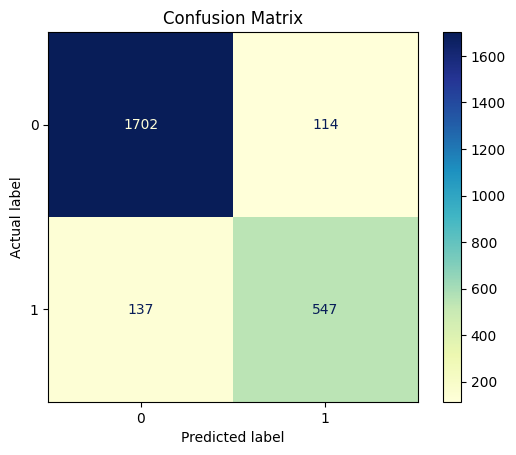

In [17]:
# Split data (train, test) [In-text Citation: (Navlani, 2024)]
x_train, x_test, y_train, y_test = train_test_split(x_predictors[list(final_model.params.keys())], target, test_size=0.25, random_state=42)

target_predicted_prob = final_model.predict(x_test)

# convert prediction probabilities to binary
target_predicted = np.where(target_predicted_prob >= 0.5, 1, 0)

# Create a confusion matrix
matrix = metrics.confusion_matrix(y_test, target_predicted)
print(matrix)

# Visualization
metrics.ConfusionMatrixDisplay(matrix).plot(cmap='YlGnBu')
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.show()

In [20]:
# Calculate accuracy score
accuracy_score = metrics.accuracy_score(y_test, target_predicted)
precision_score = metrics.precision_score(y_test, target_predicted)
f1_score = metrics.f1_score(y_test, target_predicted)
print(f'Accuracy: {accuracy_score}')
print(f'Precision: {precision_score}')
print(f'F1 Score: {f1_score}')

Accuracy: 0.8996
Precision: 0.8275340393343419
F1 Score: 0.8133828996282528
